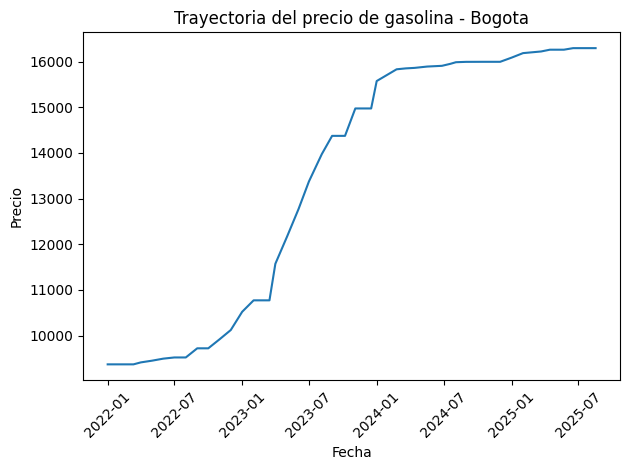

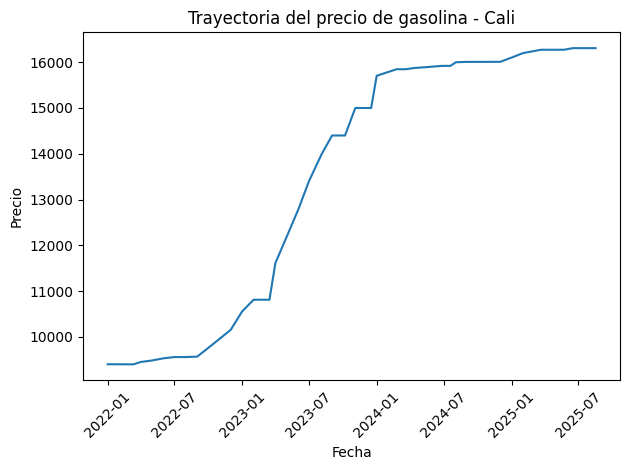

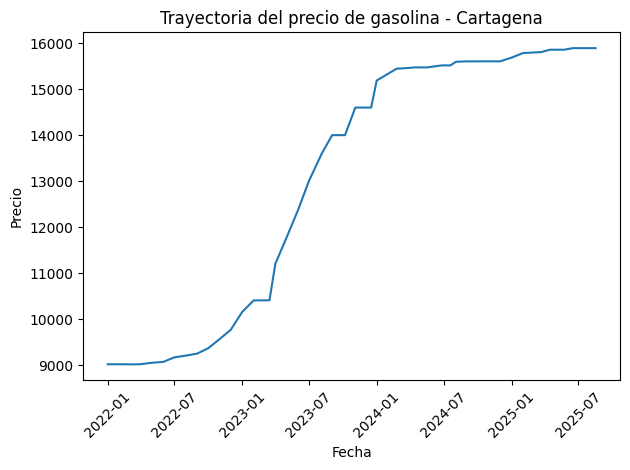

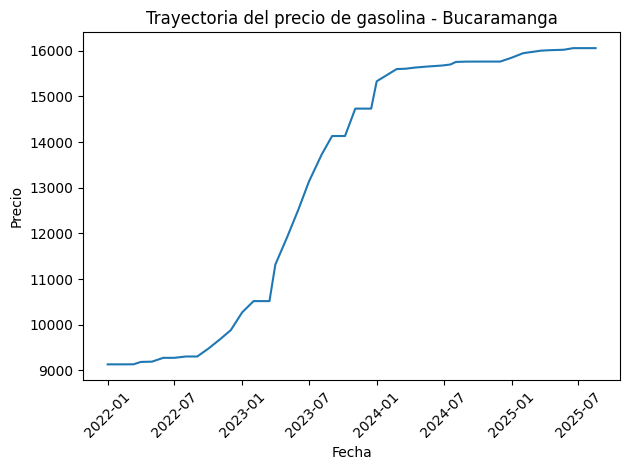

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_excel('.\content\BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx', header=1)
df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Sort by date
df = df.sort_values('Fecha')

# Plot trajectories
for city in ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']:
    plt.figure()
    plt.plot(df['Fecha'], df[city].astype(float))
    plt.title(f'Trayectoria del precio de gasolina - {city}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<iframe src="gasolina_interactiva.html" width="100%" height="600"></iframe>

/tmp/ipython-input-1512145760.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


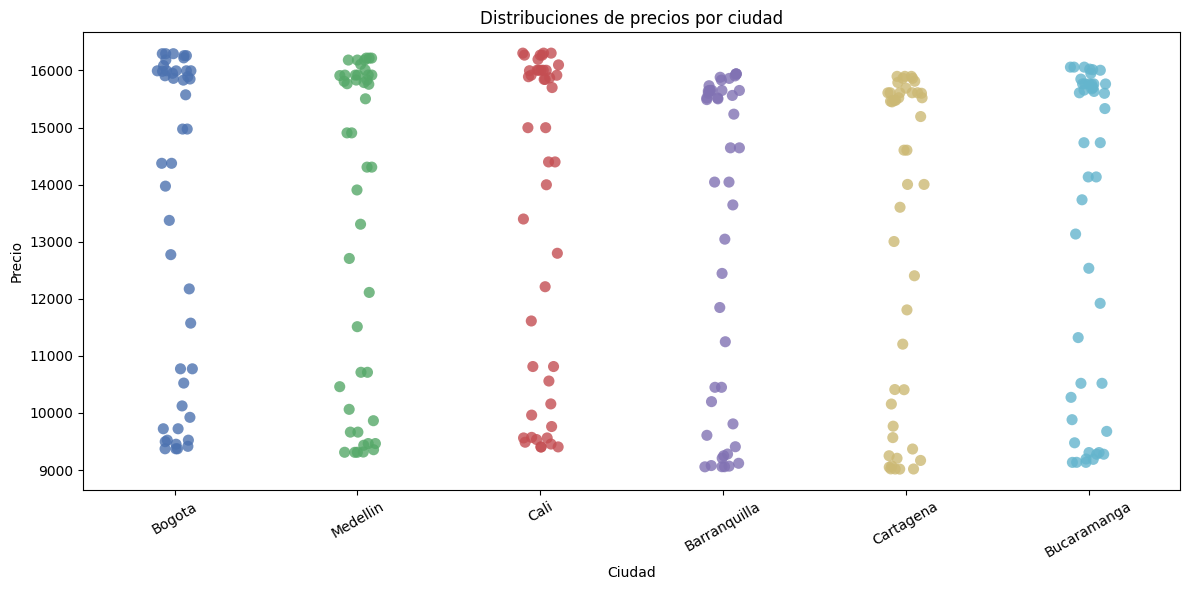

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar datos ---
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

# Limpiar tabla
df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

# Convertir a formato largo
df_long = df.melt(id_vars="Fecha",
                  var_name="Ciudad",
                  value_name="Precio")

df_long["Precio"] = pd.to_numeric(df_long["Precio"], errors="coerce")

# --- Colores definidos por ciudad ---
colores = {
    "Bogota": "#4C72B0",        # azul
    "Medellin": "#55A868",      # verde
    "Cali": "#C44E52",          # rojo
    "Barranquilla": "#8172B3",  # morado
    "Cartagena": "#CCB974",     # dorado
    "Bucaramanga": "#64B5CD"    # turquesa
}

# Gráfico
plt.figure(figsize=(12,6))
sns.stripplot(
    data=df_long,
    x="Ciudad",
    y="Precio",
    jitter=True,
    alpha=0.8,
    size=8,
    palette=colores
)

plt.title("Distribuciones de precios por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Precio")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

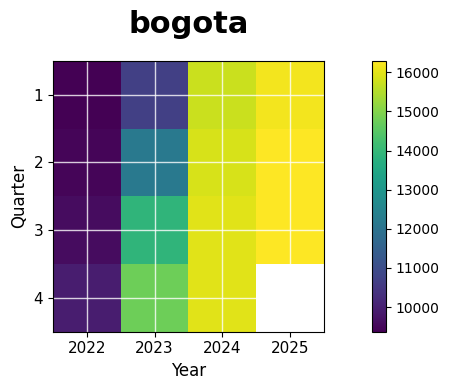

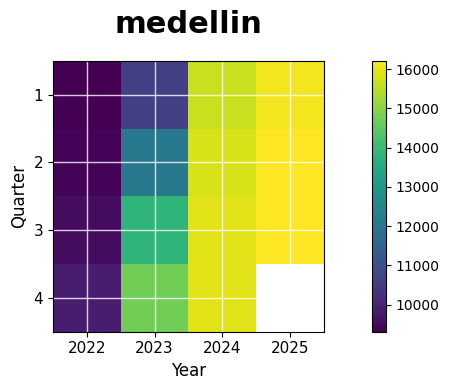

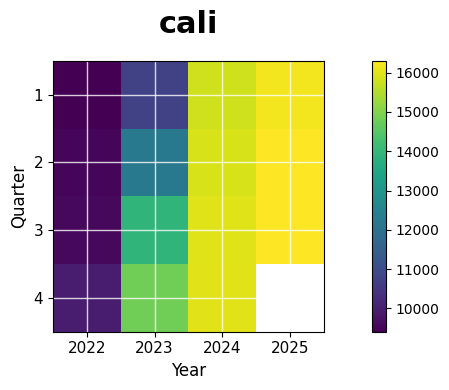

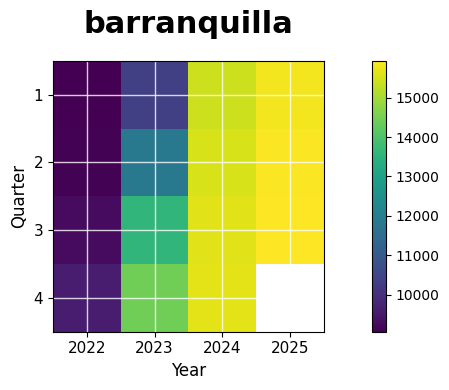

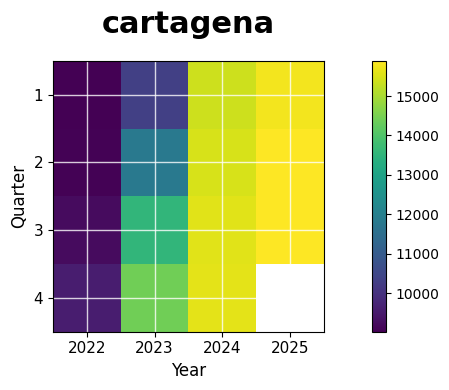

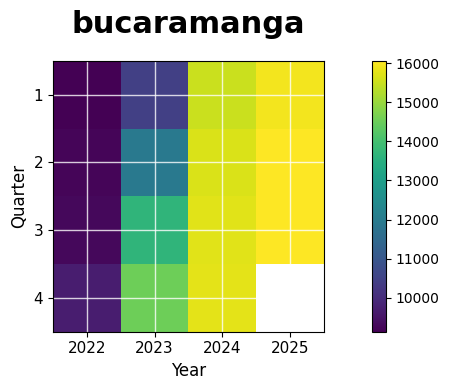

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]

for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["Año"] = df["Fecha"].dt.year
df["Trimestre"] = df["Fecha"].dt.quarter


# -----------------------
# 2. Función con estética idéntica a tu imagen
# -----------------------
def heatmap_ciudad(ciudad):

    tabla = df.groupby(["Año", "Trimestre"])[ciudad].mean().unstack()

    plt.figure(figsize=(10, 4))

    # heatmap estilo cuadrado
    plt.imshow(
        tabla.T,
        cmap="viridis",      # Colormap igual a ejemplo
        aspect="equal",      # Cuadrados perfectos
        interpolation="none" # Sin suavizado
    )

    # Título similar al ejemplo
    plt.title(
        ciudad.lower(),
        fontsize=22,
        fontweight="semibold",
        pad=20
    )

    # Etiquetas estéticas
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Quarter", fontsize=12)

    # Eje X (años)
    plt.xticks(
        ticks=np.arange(len(tabla.index)),
        labels=tabla.index,
        fontsize=11
    )

    # Eje Y (trimestres)
    plt.yticks(
        ticks=[0,1,2,3],
        labels=["1","2","3","4"],
        fontsize=11
    )

    # Cuadrícula estilo suave
    plt.grid(
        color="white",
        linestyle="-",
        linewidth=1,
        alpha=0.8
    )

    # Barra de color estilo foto
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()


# -----------------------
# 3. Generar mapas de calor para cada ciudad
# -----------------------
for ciudad in ciudades:
    heatmap_ciudad(ciudad)

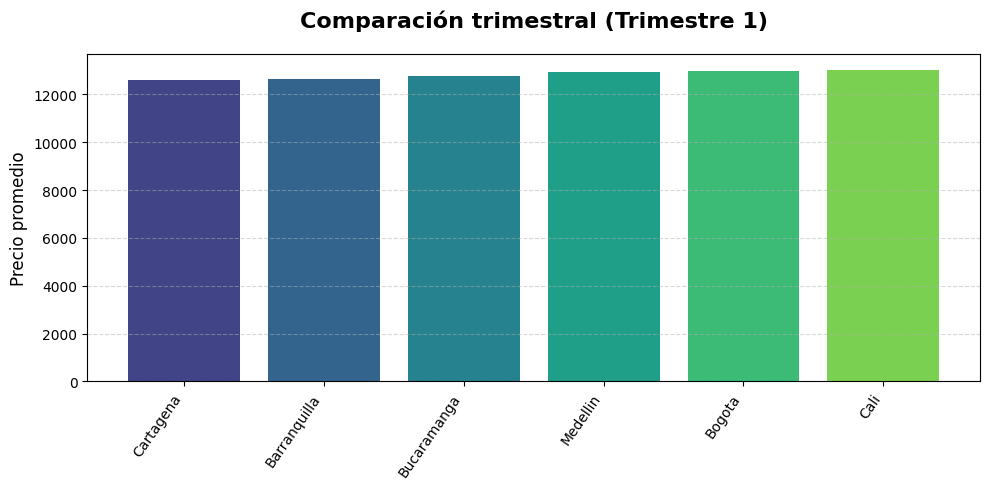

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------
# 1. Cargar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]

for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["Año"] = df["Fecha"].dt.year
df["Trimestre"] = df["Fecha"].dt.quarter


# -----------------------
# 2. Seleccionar trimestre
# -----------------------
trimestre = 1   # ← Cambia aquí 1, 2, 3 o 4


# -----------------------
# 3. Calcular promedios por ciudad
# -----------------------
promedios = {}

for ciudad in ciudades:
    promedios[ciudad] = df[df["Trimestre"] == trimestre][ciudad].mean()

# Ordenar por valor (opcional)
ciudades_ord = sorted(promedios, key=promedios.get)
valores_ord = [promedios[c] for c in ciudades_ord]


# -----------------------
# 4. Gráfica de barras estilo la foto
# -----------------------
plt.figure(figsize=(10,5))

plt.bar(
    ciudades_ord,
    valores_ord,
    color=plt.cm.viridis(np.linspace(0.2,0.8,len(ciudades_ord)))  # tonos azul/verde suaves
)

plt.title(f"Comparación trimestral (Trimestre {trimestre})",
          fontsize=16, fontweight="bold", pad=20)

plt.ylabel("Precio promedio", fontsize=12)

# Rotar etiquetas como en la imagen
plt.xticks(rotation=55, ha="right", fontsize=10)

# Cuadrícula suave en eje Y
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel(".\content\BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga","Fecha"]
df = df[df["Fecha"] != "Fecha"]

df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
df = df.sort_values("Fecha")

ciudades = ["Bogota","Medellin","Cali","Barranquilla","Cartagena","Bucaramanga"]
for c in ciudades:
    df[c] = pd.to_numeric(df[c], errors="coerce")


# -----------------------
# 2. Elegir ciudad para la prueba ADF
# -----------------------
ciudad = "Bogota"   # ← Cambia aquí la ciudad

serie = df[ciudad].dropna()


# -----------------------
# 3. Aplicar prueba Dickey-Fuller
# -----------------------
resultado = adfuller(serie)

print(f"Resultados ADF para {ciudad}:")
print("-------------------------------------------")
print(f"ADF Statistic: {resultado[0]}")
print(f"p-value: {resultado[1]}")
print("Valores críticos:")
for key, value in resultado[4].items():
    print(f"   {key}: {value}")

Resultados ADF para Bogota:
-------------------------------------------
ADF Statistic: -1.6820149584461843
p-value: 0.4404019188310303
Valores críticos:
   1%: -3.596635636000432
   5%: -2.933297331821618
   10%: -2.6049909750566895


In [ ]:
df["Bogota_diff"] = df["Bogota"].diff()


/tmp/ipython-input-1525240739.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


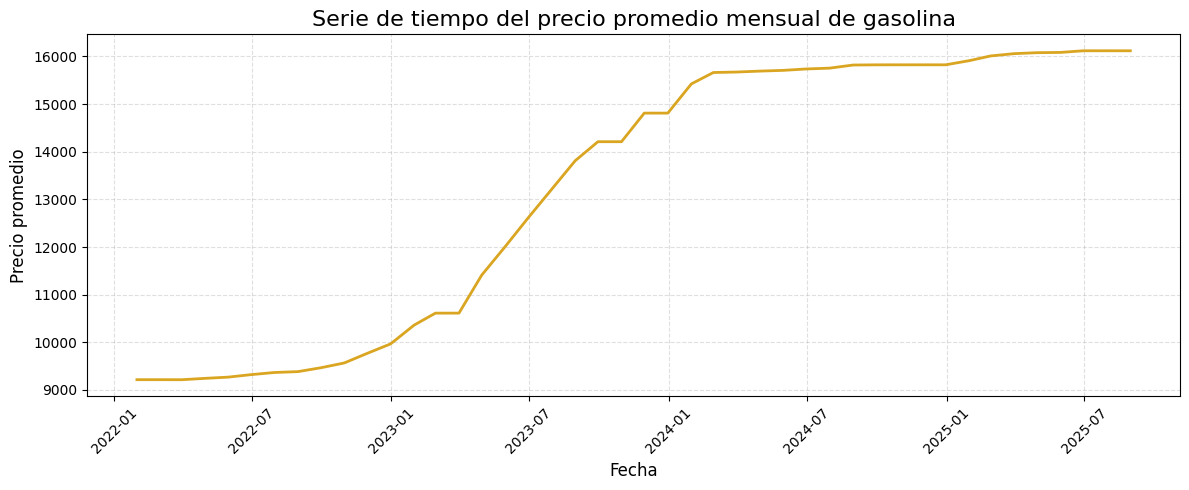

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------
# 1. Cargar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

# Limpiar columnas
df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']

# Eliminar filas incorrectas
df = df[df['Fecha'] != 'Fecha']

# Convertir fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

# Convertir columnas numéricas
cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Promedio mensual de todas las ciudades
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)

# Agrupar por mes
monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

# -----------------------
# 3. Gráfico de la serie de tiempo
# -----------------------
plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, linewidth=2, color="goldenrod")

plt.title("Serie de tiempo del precio promedio mensual de gasolina", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio promedio", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# -----------------------
# 1. Cargar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Crear promedio mensual
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)
monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

# -----------------------
# 3. Prueba Dickey-Fuller
# -----------------------
resultado = adfuller(monthly.dropna())

print("Resultados ADF para el promedio mensual:")
print("-----------------------------------------")
print(f"ADF Statistic: {resultado[0]}")
print(f"p-value: {resultado[1]}")
print("Valores críticos:")
for key, value in resultado[4].items():
    print(f"   {key}: {value}")


Resultados ADF para el promedio mensual:
-----------------------------------------
ADF Statistic: -1.6464840464795323
p-value: 0.458874737687625
Valores críticos:
   1%: -3.60098336718852
   5%: -2.9351348158036012
   10%: -2.6059629803688282


/tmp/ipython-input-2259797352.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# -----------------------
# 1. Cargar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Serie mensual promedio
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)
monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

# -----------------------
# 3. Primera diferencia
# -----------------------
monthly_diff = monthly.diff().dropna()

# -----------------------
# 4. Prueba Dickey-Fuller en la serie diferenciada
# -----------------------
resultado = adfuller(monthly_diff)

print("Resultados ADF después de diferenciar:")
print("-----------------------------------------")
print(f"ADF Statistic: {resultado[0]}")
print(f"p-value: {resultado[1]}")
print("Valores críticos:")
for key, value in resultado[4].items():
    print(f"   {key}: {value}")


Resultados ADF después de diferenciar:
-----------------------------------------
ADF Statistic: -1.9355759827272783
p-value: 0.3155144941377979
Valores críticos:
   1%: -3.60098336718852
   5%: -2.9351348158036012
   10%: -2.6059629803688282


/tmp/ipython-input-2361145005.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# -----------------------
# 1. Cargar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Serie mensual promedio
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)
monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

# -----------------------
# 3. Segunda diferencia
# -----------------------
monthly_diff2 = monthly.diff().diff().dropna()

# -----------------------
# 4. Prueba Dickey-Fuller en segunda diferencia
# -----------------------
resultado = adfuller(monthly_diff2)

print("Resultados ADF después de segunda diferencia:")
print("----------------------------------------------")
print(f"ADF Statistic: {resultado[0]}")
print(f"p-value: {resultado[1]}")
print("Valores críticos:")
for key, value in resultado[4].items():
    print(f"   {key}: {value}")


Resultados ADF después de segunda diferencia:
----------------------------------------------
ADF Statistic: -6.900002352497615
p-value: 1.2893128080622207e-09
Valores críticos:
   1%: -3.6055648906249997
   5%: -2.937069375
   10%: -2.606985625


/tmp/ipython-input-2064788156.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


/tmp/ipython-input-713034092.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


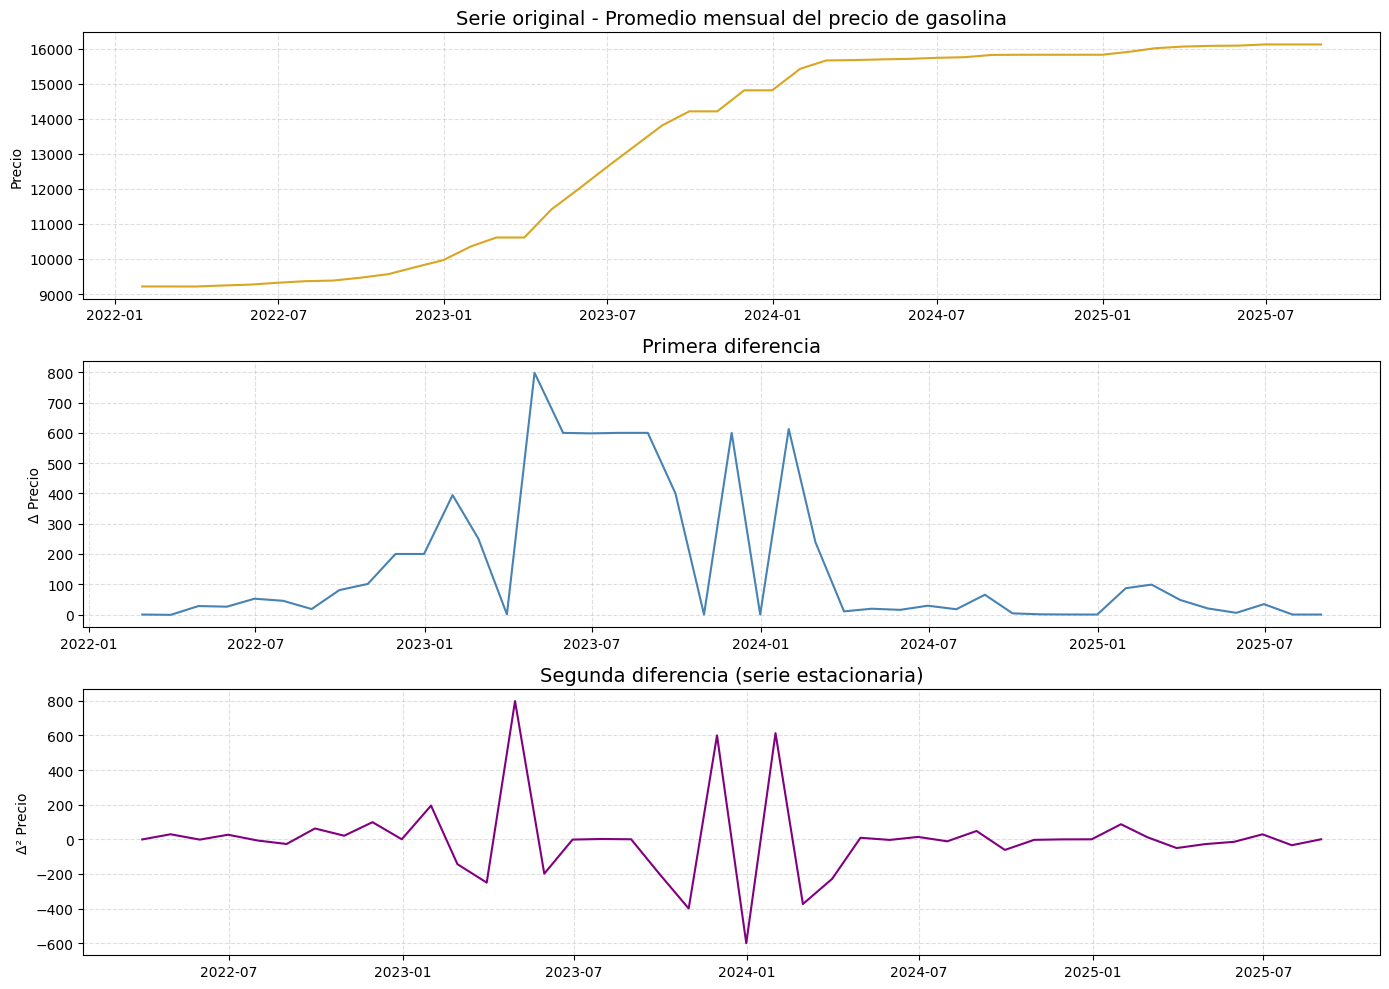

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Serie mensual Promedio
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)
monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

# -----------------------
# 3. Diferenciación
# -----------------------
monthly_diff1 = monthly.diff().dropna()
monthly_diff2 = monthly_diff1.diff().dropna()

# -----------------------
# 4. Gráficos
# -----------------------
plt.figure(figsize=(14,10))

# Serie original
plt.subplot(3,1,1)
plt.plot(monthly.index, monthly.values, color='goldenrod')
plt.title("Serie original - Promedio mensual del precio de gasolina", fontsize=14)
plt.ylabel("Precio")
plt.grid(True, linestyle="--", alpha=0.4)

# Primera diferencia
plt.subplot(3,1,2)
plt.plot(monthly_diff1.index, monthly_diff1.values, color='steelblue')
plt.title("Primera diferencia", fontsize=14)
plt.ylabel("Δ Precio")
plt.grid(True, linestyle="--", alpha=0.4)

# Segunda diferencia
plt.subplot(3,1,3)
plt.plot(monthly_diff2.index, monthly_diff2.values, color='purple')
plt.title("Segunda diferencia (serie estacionaria)", fontsize=14)
plt.ylabel("Δ² Precio")
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


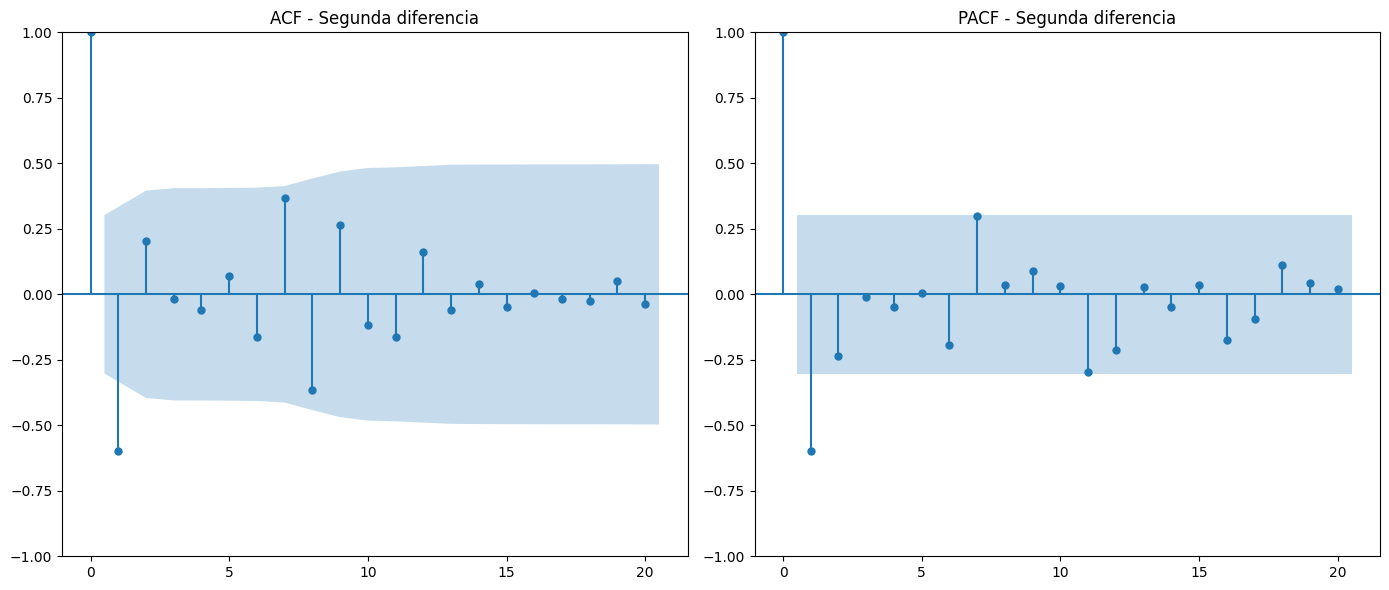

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Serie mensual promedio
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)
monthly = df.groupby(pd.Grouper(key='Fecha', freq='ME'))['Promedio'].mean()

# -----------------------
# 3. Segunda diferencia (serie estacionaria)
# -----------------------
monthly_diff2 = monthly.diff().diff().dropna()

# -----------------------
# 4. ACF y PACF
# -----------------------
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plot_acf(monthly_diff2, ax=plt.gca(), lags=20)
plt.title("ACF - Segunda diferencia")

plt.subplot(1,2,2)
plot_pacf(monthly_diff2, ax=plt.gca(), lags=20, method='ywm')
plt.title("PACF - Segunda diferencia")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Serie mensual promedio
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)
monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

# -----------------------
# 3. Ajustar el modelo ARIMA(1,2,1)
# -----------------------
model = ARIMA(monthly, order=(1,2,1))
model_fit = model.fit()

# Mostrar resumen
print(model_fit.summary())


/tmp/ipython-input-1211417617.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


                               SARIMAX Results                                
Dep. Variable:               Promedio   No. Observations:                   44
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -279.453
Date:                Fri, 07 Nov 2025   AIC                            564.907
Time:                        00:37:46   BIC                            570.120
Sample:                    01-31-2022   HQIC                           566.817
                         - 08-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3236      0.191     -1.694      0.090      -0.698       0.051
ma.L1         -0.3560      0.233     -1.526      0.127      -0.813       0.101
sigma2      3.297e+04   4643.427      7.099      0.0

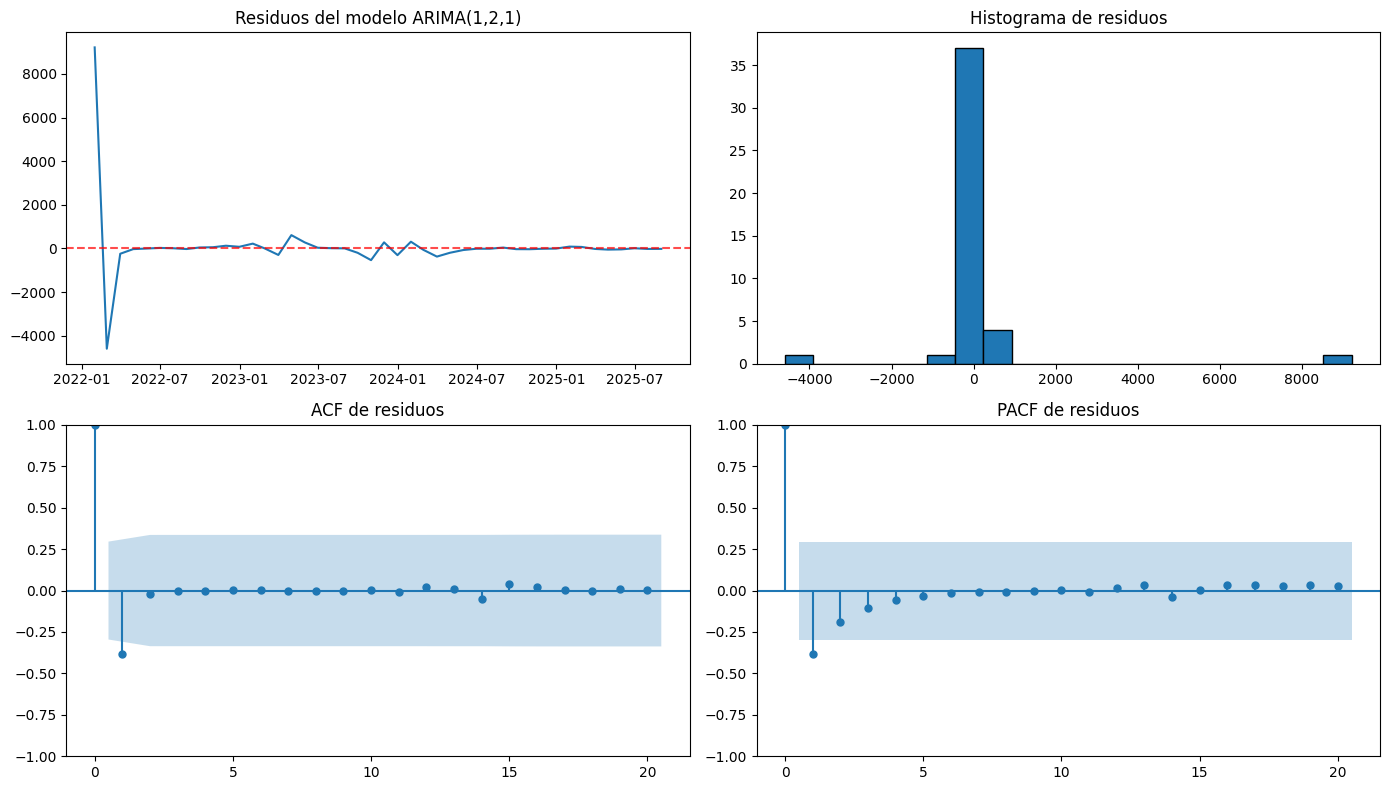


✅ Prueba Jarque-Bera (Normalidad):
(np.float64(1292.8097347722744), np.float64(1.861799969260645e-281), np.float64(3.9154943473743242), np.float64(28.37409234440005))

✅ Prueba Ljung-Box (Autocorrelación de residuos):
    lb_stat  lb_pvalue
10  6.86558   0.738071


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera

# -----------------------
# 1. Obtener residuos del modelo
# -----------------------
residuals = model_fit.resid

# -----------------------
# 2. Gráfica de residuos
# -----------------------
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.plot(residuals)
plt.title("Residuos del modelo ARIMA(1,2,1)")
plt.axhline(0, color='red', linestyle='--', alpha=0.7)

plt.subplot(2,2,2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histograma de residuos")

plt.subplot(2,2,3)
plot_acf(residuals, ax=plt.gca(), lags=20) # Adjusted lags
plt.title("ACF de residuos")

plt.subplot(2,2,4)
plot_pacf(residuals, ax=plt.gca(), lags=20, method='ywm') # Adjusted lags
plt.title("PACF de residuos")

plt.tight_layout()
plt.show()

# -----------------------
# 3. Prueba Jarque-Bera (normalidad)
# -----------------------
jb_test = jarque_bera(residuals)
print("\n✅ Prueba Jarque-Bera (Normalidad):")
print(jb_test)

# -----------------------
# 4. Prueba Ljung-Box (autocorrelación)
# -----------------------
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\n✅ Prueba Ljung-Box (Autocorrelación de residuos):")
print(lb_test)

In [ ]:
!pip install numpy==1.26.4 pmdarima --force-reinstall --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 121.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 138.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 282.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 314.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 245.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 191.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 232.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 160.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 334.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import pandas as pd

# -----------------------
# 1. Cargar y preparar datos
# -----------------------
df = pd.read_excel("BASE DE DATOS DE PRECIOS DE GASOLINA (1).xlsx", header=1)

df = df.drop(columns=[df.columns[0]])
df.columns = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga','Fecha']
df = df[df['Fecha'] != 'Fecha']

df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values('Fecha')

cities = ['Bogota','Medellin','Cali','Barranquilla','Cartagena','Bucaramanga']
for c in cities:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -----------------------
# 2. Serie mensual promedio
# -----------------------
df['Promedio'] = df[cities].mean(axis=1)

monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()

print("✅ Serie 'monthly' reconstruida correctamente")
print(monthly.head())


✅ Serie 'monthly' reconstruida correctamente
Fecha
2022-01-31    9216.333333
2022-02-28    9216.333333
2022-03-31    9215.333333
2022-04-30    9243.333333
2022-05-31    9269.333333
Freq: ME, Name: Promedio, dtype: float64


/tmp/ipython-input-3610809167.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Promedio'].mean()


In [ ]:
from pmdarima import auto_arima

model_auto = auto_arima(
    monthly,
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    max_p=5,
    max_q=5,
    max_d=3,
)

print(model_auto.summary())


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=582.497, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=593.613, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=586.385, Time=0.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=590.624, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=608.700, Time=0.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=580.657, Time=0.66 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=585.646, Time=0.49 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=581.256, Time=0.56 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=582.456, Time=0.89 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=582.815, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=580.697, Time=0.18 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=579.265, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=592.254, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=579.625, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=581.056, Time=0.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=580.997, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=600.043, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=586.685, Time=0.11 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=579.146, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=578.718, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=589.002, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=578.958, Time=0.07 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=580.956, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=579.641, Time=0.14 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 6.828 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -286.359
Date:                Fri, 07 Nov 2025   AIC                            578.718
Time:                        00:52:11   BIC                            584.002
Sample:                    01-31-2022   HQIC                           580.667
                         - 08-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


                               SARIMAX Results                                
Dep. Variable:               Promedio   No. Observations:                   44
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -279.416
Date:                Fri, 07 Nov 2025   AIC                            564.831
Time:                        00:55:30   BIC                            570.044
Sample:                    01-31-2022   HQIC                           566.742
                         - 08-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6762      0.091     -7.396      0.000      -0.855      -0.497
ar.L2         -0.2103      0.115     -1.826      0.068      -0.436       0.015
sigma2      3.287e+04   4841.898      6.789      0.0

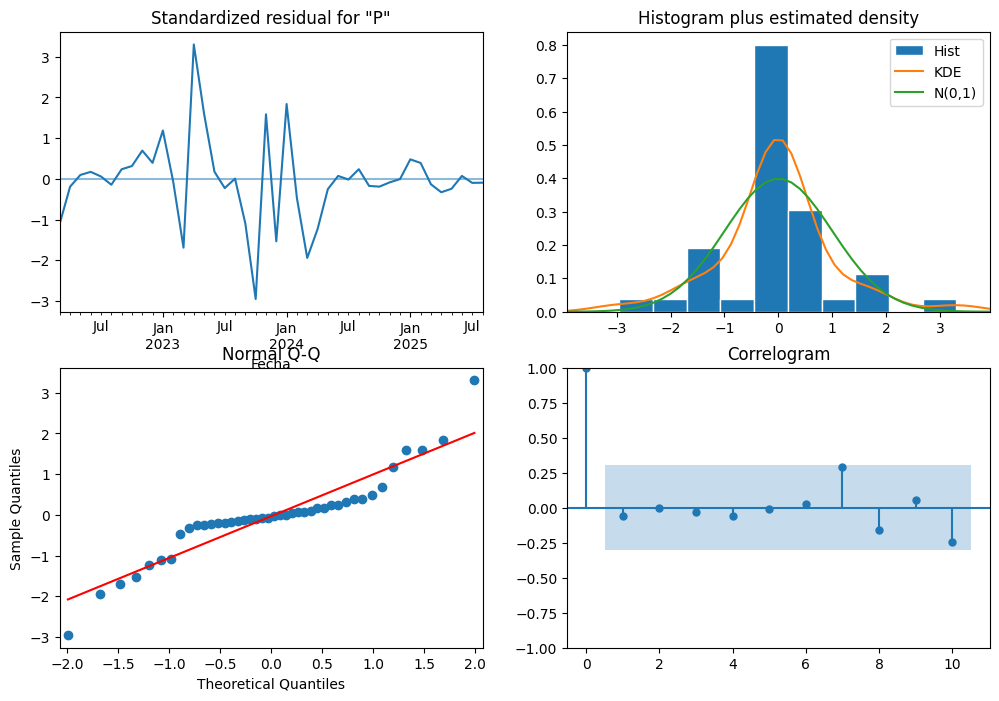

/tmp/ipython-input-2405889390.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_idx = pd.date_range(


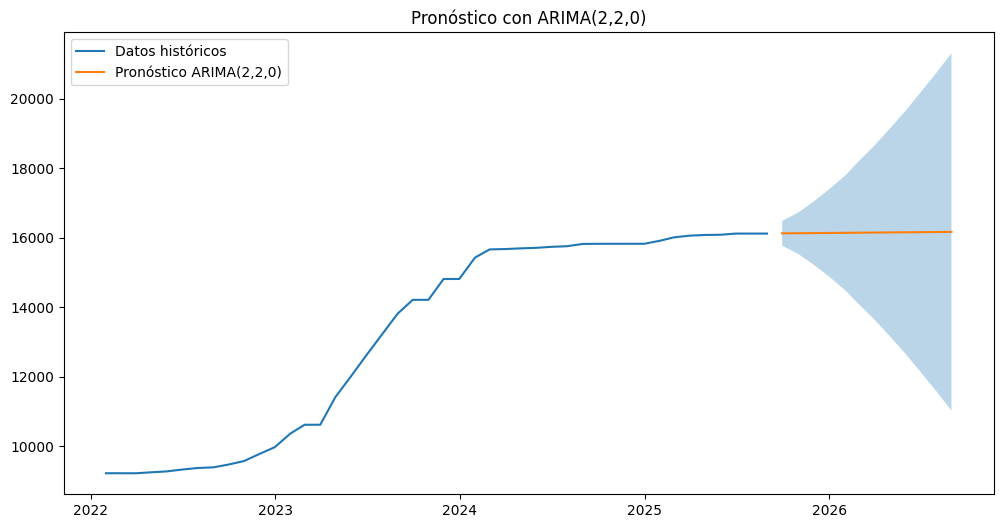

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# ================================
# 1. Ajustar modelo ARIMA(2,2,0)
# ================================
model_220 = ARIMA(monthly, order=(2, 2, 0))
result_220 = model_220.fit()

# Mostrar resumen del modelo
print(result_220.summary())

# ================================
# 2. Diagnóstico de residuos
# ================================
result_220.plot_diagnostics(figsize=(12, 8))
plt.show()

# ================================
# 3. Pronóstico
# ================================
n_periods = 12  # cambiar si quieres más meses
forecast = result_220.get_forecast(steps=n_periods)

pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Crear índice futuro
last_date = monthly.index[-1]
future_idx = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=n_periods,
    freq="M"
)

pred_mean.index = future_idx
conf_int.index = future_idx

# ================================
# 4. Gráfica del pronóstico
# ================================
plt.figure(figsize=(12, 6))
plt.plot(monthly, label='Datos históricos')
plt.plot(pred_mean, label='Pronóstico ARIMA(2,2,0)')
plt.fill_between(future_idx, conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.3)
plt.legend()
plt.title("Pronóstico con ARIMA(2,2,0)")
plt.show()


In [ ]:
result_220 = model_220.fit()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox, normal_ad, het_arch
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
import numpy as np

# ================================
# 1. Residuos del modelo
# ================================
res = result_220.resid

# ================================
# 2. Prueba Ljung-Box (Ruido blanco)
# ================================
print("✅ Prueba Ljung-Box (Ruido blanco):")
lb_test = acorr_ljungbox(res, lags=[10], return_df=True)
print(lb_test)

# ================================
# 3. Prueba Jarque-Bera (Normalidad)
# ================================
print("\n✅ Prueba Jarque-Bera (Normalidad):")
jb = jarque_bera(res)
print(f"JB statistic: {jb[0]:.4f}, p-value: {jb[1]:.8f}")

# ================================
# 4. Prueba Durbin-Watson
# ================================
print("\n✅ Durbin-Watson:")
dw = durbin_watson(res)
print(f"DW = {dw:.4f}")

# ================================
# 5. Prueba Anderson-Darling (normalidad alternativa)
# ================================
print("\n✅ Prueba Anderson-Darling:")
ad_stat, ad_p = normal_ad(res)
print(f"AD statistic: {ad_stat:.4f}, p-value: {ad_p:.8f}")


✅ Prueba Ljung-Box (Ruido blanco):
     lb_stat  lb_pvalue
10  6.865711   0.738059

✅ Prueba Jarque-Bera (Normalidad):
JB statistic: 1292.6682, p-value: 0.00000000

✅ Durbin-Watson:
DW = 1.9785

✅ Prueba Anderson-Darling:
AD statistic: 11.4743, p-value: 0.00000000


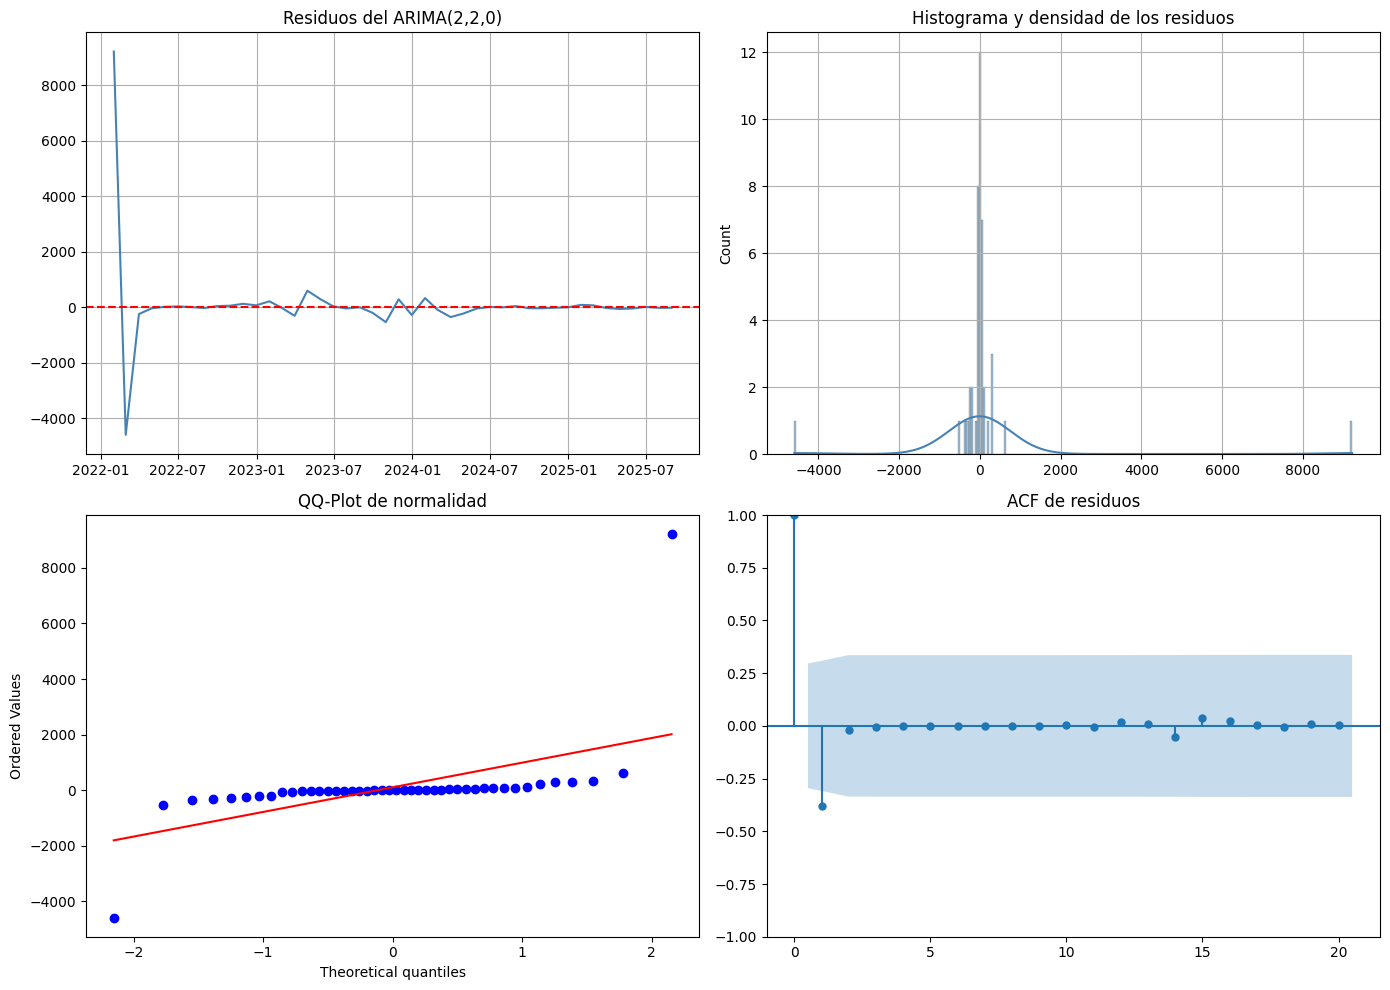

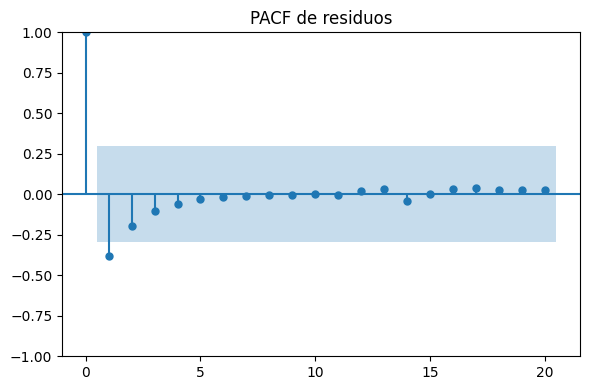

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# -------- RESIDUALES DEL MODELO ------------
residuals = result_220.resid

plt.figure(figsize=(14,10))

# ---- 1. Residuos en el tiempo ----
plt.subplot(2,2,1)
plt.plot(residuals, color='steelblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del ARIMA(2,2,0)")
plt.grid(True)

# ---- 2. Histograma + KDE ----
plt.subplot(2,2,2)
sns.histplot(residuals, kde=True, color='steelblue')
plt.title("Histograma y densidad de los residuos")
plt.grid(True)

# ---- 3. QQ-PLOT ----
plt.subplot(2,2,3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot de normalidad")

# ---- 4. ACF y PACF ----
plt.subplot(2,2,4)
plot_acf(residuals, ax=plt.gca(), lags=20)
plt.title("ACF de residuos")

plt.tight_layout()
plt.show()

# PACF por separado
plt.figure(figsize=(6,4))
plot_pacf(residuals, lags=20, method='ywm', ax=plt.gca())
plt.title("PACF de residuos")
plt.tight_layout()
plt.show()